# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat1"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.4993357062339783
Epoch 1, Loss 1.4881551861763
Epoch 2, Loss 1.514495313167572
Epoch 3, Loss 1.4591132998466492
Epoch 4, Loss 1.476506233215332
Epoch 5, Loss 1.4496489763259888
Epoch 6, Loss 1.4720162749290466
Epoch 7, Loss 1.46932852268219
Epoch 8, Loss 1.4378200769424438
Epoch 9, Loss 1.4422621130943298
Epoch 10, Loss 1.4385572671890259
Epoch 11, Loss 1.3952959179878235
Epoch 12, Loss 1.426185667514801
Epoch 13, Loss 1.408135175704956
Epoch 14, Loss 1.374605655670166
Epoch 15, Loss 1.3757819533348083
Epoch 16, Loss 1.3759849071502686
Epoch 17, Loss 1.3406956791877747
Epoch 18, Loss 1.3334250450134277
Epoch 19, Loss 1.3292449116706848
Epoch 20, Loss 1.3216436505317688
Epoch 21, Loss 1.3072497844696045
Epoch 22, Loss 1.2945742011070251
Epoch 23, Loss 1.2933949828147888
Epoch 24, Loss 1.3027292490005493
Epoch 25, Loss 1.2974496483802795
Epoch 26, Loss 1.2738751769065857
Epoch 27, Loss 1.2738438248634338
Epoch 28, Loss 1.2476686239242554
Epoch 29, Loss 1.2471190690994263


# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

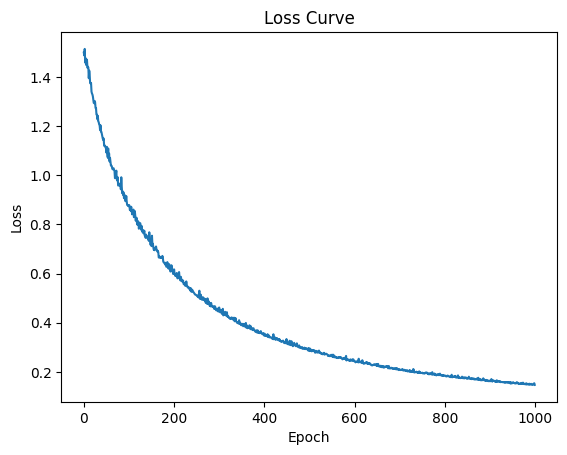

In [5]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


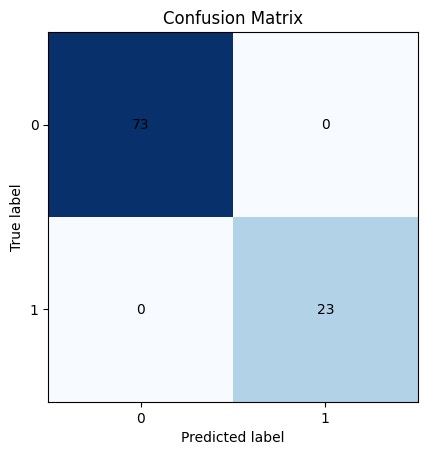

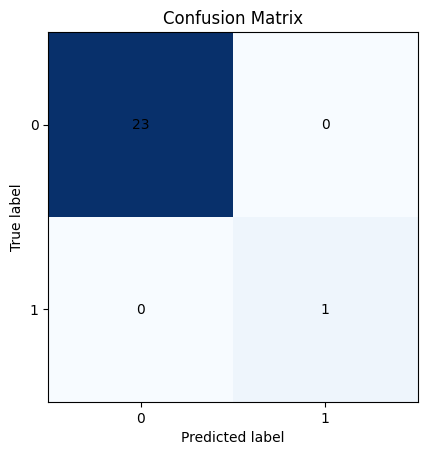

In [6]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

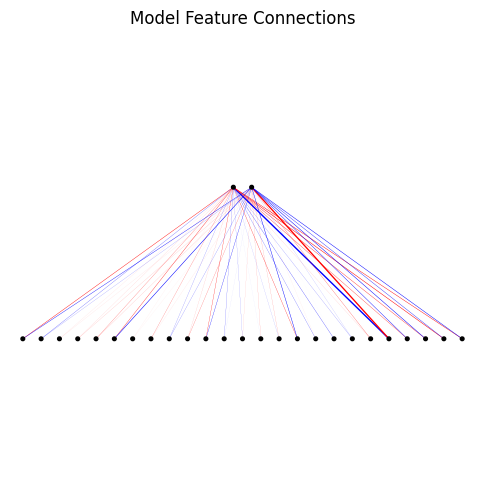

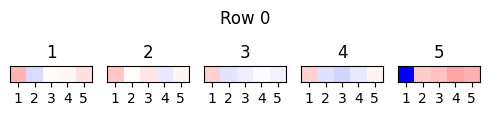

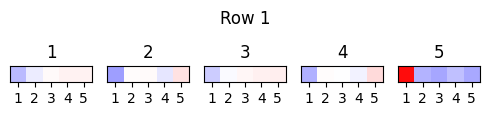

In [15]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)